In [1]:
import h5py
import numpy as np
def load_dataset():
    with h5py.File('data/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('data/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
x_train, y_train, x_test, y_test, classes = load_dataset()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(classes)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
[b'non-cat' b'cat']


In [8]:
x_train[0][0][1]

array([22, 33, 59], dtype=uint8)

y = [1]. It is a cat's picture'


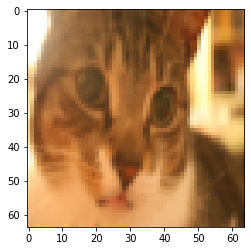

In [5]:
import matplotlib.pyplot as plt
index = 200
plt.imshow(x_train[index])
print("y = " + str(y_train[:,index]) + ". It is a " + classes[np.squeeze(y_train[:, index])].decode("utf-8") + "'s picture'")

In [6]:
x_train.shape

(209, 64, 64, 3)

In [7]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[1]*x_test.shape[2]*x_test.shape[3], x_test.shape[0])
print(x_train.shape)
print(x_test.shape)

(12288, 209)
(12288, 50)


In [8]:
print(y_train.shape)
print(y_test.shape)

(1, 209)
(1, 50)


In [9]:
x_train

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

In [10]:
x_train = x_train/255
x_train

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [11]:
x_test = x_test/255
x_test

array([[0.61960784, 0.40784314, 0.3254902 , ..., 0.36470588, 0.64313725,
        0.43921569],
       [0.35294118, 0.64705882, 0.43529412, ..., 0.45490196, 0.36470588,
        0.65490196],
       [0.45098039, 0.36862745, 0.67058824, ..., 0.69411765, 0.50196078,
        0.41960784],
       ...,
       [0.36078431, 0.55686275, 0.34117647, ..., 0.18823529, 0.16862745,
        0.34117647],
       [0.12156863, 0.19215686, 0.34901961, ..., 0.2745098 , 0.10588235,
        0.13333333],
       [0.29803922, 0.15294118, 0.14509804, ..., 0.01960784, 0.08627451,
        0.01960784]])

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [14]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [16]:
dim = 2
w, b = initialize_with_zeros(10)
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                     # compute activation
    cost = (1/m)*np.sum(-Y*np.log(A)-(1-Y)*np.log(1-A))                                  # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [21]:
w, b, X, Y = np.array([[1],[2]]), 4, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99999082]
 [1.99997328]]
db = 0.49999123352506214
cost = 7.000008766482935


In [38]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
    
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [24]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.10271242 0.10581485]
 [0.20674294 0.21441959]]
b = [[3.10271242 3.10581485]
 [2.20674294 2.21441959]]
dw = [[0.97575251 0.94422488]
 [1.94154238 1.86545269]]
db = 0.943508837664718


In [25]:
costs

[7.000008766482935]

In [41]:
def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)   
    
    for i in range(A.shape[1]):
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
        pass
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [29]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [52]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(x_train.shape[0])
    w = w.reshape(x_train.shape[0], 1)
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost = False)
    w = parameters["w"]
    b = parameters["b"]
    y_pred_test = predict(w, b, x_test)
    y_pred_train = predict(w, b, x_train)
    print("train accuracy: {}".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {}".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": y_pred_test,
         "Y_prediction_train" : y_pred_train,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [53]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.009, print_cost = True)

train accuracy: 99.52153110047847
test accuracy: 86.0


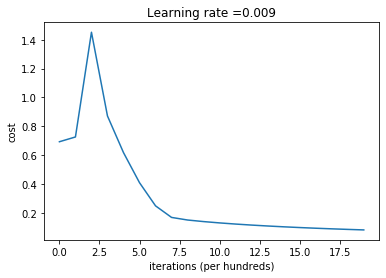

In [58]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()